<a href="https://colab.research.google.com/github/MartinNde/MartinN_1/blob/main/Image_Challenge_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries 

In [ ]:

# import libraries
import os
import pandas as pd
import numpy as np

import cv2
from skimage.feature import hog

from sklearn.model_selection import train_test_split


from sklearn.decomposition import PCA

# libraries for data plotting
import seaborn as sns
import matplotlib.pyplot as plt 

# library for evaluation
from sklearn import metrics

# libraries for ML algorithms
from sklearn import svm
from sklearn.linear_model import LinearRegression

from random import randint
from random import seed

!pip install tensorflow tensorflow-gpu opencv-python matplotlib

import tensorflow as tf

gpus =tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

RANDOM_SEED = 100

#Load image data set

In [ ]:
# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [3]:

# # unzip file
import shutil
# shutil.unpack_archive('/content/drive/MyDrive/data (2).zip', '/content/drive/MyDrive/Colab No
shutil.unpack_archive('/content/drive/MyDrive/data (2).zip', '/content/drive/MyDrive/data', 'zip')


In [4]:
data_folder = '/content/drive/MyDrive/data'

In [5]:

# load training data
df_train = pd.read_csv(os.path.join(data_folder, 'train.csv'))

# summarise the details
print(f'Number of entries: {len(df_train)}')
df_train.head()

Number of entries: 10000


,id,label
0,1,cat
1,2,dog
2,3,cat
3,4,cat
4,5,cat


In [6]:
# load testing data
df_test = pd.read_csv(os.path.join(data_folder, 'test.csv'))

# summarise the details
print(f'Number of entries: {len(df_test)}')
df_test.head()

Number of entries: 1000


,id
0,1
1,2
2,3
3,4
4,5


<AxesSubplot:xlabel='label', ylabel='count'>

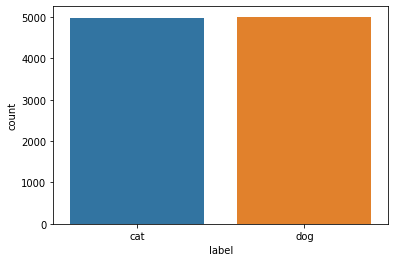

In [7]:
# Summarise label details in training data
sns.countplot(x=df_train['label'])
     

#Write the function to load the dataset.

In [8]:
# parameters
# ids - list of image ids
# folder_path - path to image folder
# dim - dimensions to resize images
def load_images(ids, folder_path, dim):
  images = []
  for id in ids:
    image_path = os.path.join(folder_path, f'{id}.jpg')
    img = cv2.imread(image_path)

    # Resize if necessary
    if img.shape[0] != dim[1] or img.shape[1] != dim[0]:
      img = cv2.resize(img, dim)
    images.append(img)
  return images

In [9]:
base_dim = (200, 200)

# load train images
train_image_folder = os.path.join(data_folder, 'train_images')
train_images = load_images(df_train['id'], train_image_folder, base_dim)
print(f'Number of training images loaded: {len(train_images)}')

# load test images
test_image_folder = os.path.join(data_folder, 'test_images')
test_images = load_images(df_test['id'], test_image_folder, base_dim)
print(f'Number of testing images loaded: {len(test_images)}')

Number of training images loaded: 10000
Number of testing images loaded: 1000


In [10]:
df_train['label'].value_counts(normalize =True)

dog    0.5011
cat    0.4989
Name: label, dtype: float64

In [11]:
df_train["label"] = df_train["label"].map({'cat':1 ,'dog':0})
df_train

,id,label
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1
...,...,...
9995,9996,1
9996,9997,0
9997,9998,1
9998,9999,0


#Feature extraction and model generation

In [12]:
# method to plot confusion matrix
def plot_confusion_matrix(matrix):
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Set2_r)
    classNames = ['0', '1']
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()

# method to calculate evaluation results
def evaluate(actuals, predictions):
  accuracy = metrics.accuracy_score(actuals, predictions)
  confusion_matrix = metrics.confusion_matrix(actuals, predictions, labels=[0, 1])
  return accuracy, confusion_matrix

#SVM

In [13]:
def build_svm_model(X_train, X_val, y_train, y_val):
  # build model
  clf = svm.SVC(kernel='linear', random_state=RANDOM_SEED) 
  clf.fit(X_train, y_train)
  return clf

# Model M1

*   Preprocessing - gray scaling
*   Features - image vector
*   Algorithm - SVM

In [14]:
# method to get image features
#def get_features_m1(images):
 # features_list = []
  #for img in images:
    # image preprocessing
   # img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # vectorise/ feature extraction
   # features = img_grayscaled.flatten()

   # features_list.append(features)

 # features_list = np.array(features_list)
 # return features_list
     

#Train and Validate Model

In [15]:
# feature extraction
#features_train = get_features_m1(train_images)
#print(features_train.shape)

In [16]:
# data split for train and validation
#X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train model
#m1 = build_svm_model(X_train, X_val, y_train, y_val)
     

In [17]:
# make predictions on validation data
#y_pred = m1.predict(X_val)

# evaluate model
#accuracy, confusion_matrix = evaluate(y_val, y_pred)
#print(f'Accuracy: {accuracy}')
#plot_confusion_matrix(confusion_matrix)

In [19]:
#y_val

# Make predictions on test images

In [20]:
# feature extraction - test data
#features_test = get_features_m1(test_images)
#print(features_test.shape)

# get model predictions
#predictions = m1.predict(features_test)
#print(predictions)

# Model M2

*   Preprocessing - gray scaling, smoothing
*   Features - image vector 
*   Algorithm - SVM




In [21]:
seed(RANDOM_SEED)
sample_images = []

# pick random sample of images
#for i in range(5):
 # value = randint(0, len(train_images)-1)
 # print(f'Image Id: {value}')
 # sample_images.append(train_images[value])

# apply preprocessing and show output images
#for img in sample_images:
 # img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 # plt.imshow(cv2.cvtColor(img_grayscaled, cv2.COLOR_BGR2RGB))
 # plt.show()

  #img_blurred = cv2.GaussianBlur(img_grayscaled,(3,3), 2)
 # plt.imshow(cv2.cvtColor(img_blurred, cv2.COLOR_BGR2RGB))
 # plt.show()
     

In [22]:
# method to get image features
#def get_features_m2(images):
 # features_list = []
 # for img in images:
    # image preprocessing
   # img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   # img_blurred = cv2.GaussianBlur(img_grayscaled,(3,3), 2)

    # vectorise/ feature extraction
    #features = img_blurred.flatten()

   # features_list.append(features)

 # features_list = np.array(features_list)
 # return features_list

#Train and validate model

In [23]:
#features_train = get_features_m2(train_images)
#print(features_train.shape)

In [24]:
# data split for train and validation
#X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train model
#m2 = build_svm_model(X_train, X_val, y_train, y_val)

In [25]:
# make predictions on validation data
#y_pred = m2.predict(X_val)

# evaluate model
#accuracy, confusion_matrix = evaluate(y_val, y_pred)
#print(f'Accuracy: {accuracy}')
#plot_confusion_matrix(confusion_matrix)

#Make predictions on test images

In [26]:
# feature extraction - test data
#features_test = get_features_m2(test_images)
#print(features_test.shape)

# get model predictions
#predictions = m2.predict(features_test)

#print(predictions)

#Model M3


*   Preprocessing - gray scaling
*   Features -edge map to vector
*   Algorithm - SVM

Canny edge detection algorithm has been used here.





In [27]:
# method to get image features
#def get_features_m3(images):
  #features_list = []
  #for img in images:
    # image preprocessing
   # img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # feature extraction
    #edges_canny = cv2.Canny(img_grayscaled, 100, 200) 
    #features = edges_canny.flatten()

    #features_list.append(features)

  #features_list = np.array(features_list)
  #return features_list

#Train and validate model

In [28]:
# feature extraction
#features_train = get_features_m3(train_images)
#print(features_train.shape)
     


In [29]:
# data split for train and validation
#X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train model
#m3 = build_svm_model(X_train, X_val, y_train, y_val)

In [30]:
# make predictions on validation data
#y_pred = m3.predict(X_val)

# evaluate model
#accuracy, confusion_matrix = evaluate(y_val, y_pred)
#print(f'Accuracy: {accuracy}')
#plot_confusion_matrix(confusion_matrix)

#Make predictions on test images

In [31]:
# feature extraction - test data
#features_test = get_features_m3(test_images)
#print(features_test.shape)

# get model predictions
#predictions = m3.predict(features_test)

#print(predictions)
     


#Model M4


*   Preprocessing - gray scaling
*   Features HOG features
*   Algorithm - SVM

In [32]:
# method to get image features
def get_features_m4(images):
  features_list = []
  for img in images:
    # image preprocessing
    img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Resize image if necessary
    img_resized = cv2.resize(img_grayscaled, (64, 128))

    # feature extraction
    features, hog_image = hog(img_resized, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True)

    features_list.append(features)

  features_list = np.array(features_list)
  return features_list

#Train and Validate model

In [33]:
# feature extraction
features_train = get_features_m4(train_images)
print(features_train.shape)
     


(10000, 3780)


In [34]:
# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train model
m4 = build_svm_model(X_train, X_val, y_train, y_val)

Accuracy: 0.6693333333333333


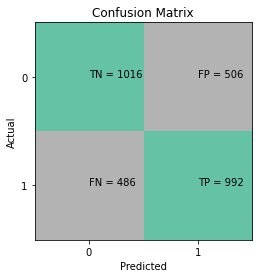

In [35]:
# make predictions on validation data
y_pred = m4.predict(X_val)

# evaluate model
accuracy, confusion_matrix = evaluate(y_val, y_pred)
print(f'Accuracy: {accuracy}')
plot_confusion_matrix(confusion_matrix)
     


#Make predictions on test images

In [36]:
#feature extraction - test data
features_test = get_features_m4(test_images)
print(features_test.shape)

# get model predictions
predictions = m4.predict(features_test)


# # Define a dictionary to map 0 and 1 to cat and dog
label_map = {0: 'cat', 1: 'dog'}

# # Convert predictions from 0 and 1 to cat and dog
predictions = [label_map[prediction] for prediction in predictions]

print(predictions)

(1000, 3780)
['cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat',

In [37]:
import json

import pandas as pd

df_test['prediction'] = predictions

data = []
for index, row in df_test.iterrows():
    data.append({'id': row['id'], 'prediction': row['prediction']})

print(data[0:5])

submission_file_path = "submission.json"
with open(submission_file_path, 'w') as fp:
    fp.write('\n'.join(json.dumps(i) for i in data))

[{'id': 1, 'prediction': 'cat'}, {'id': 2, 'prediction': 'dog'}, {'id': 3, 'prediction': 'dog'}, {'id': 4, 'prediction': 'dog'}, {'id': 5, 'prediction': 'cat'}]


#Summary



#Model M5

Lets try to combine features.

*   Preprocessing - gray scaling
*   Features - image vector + edge map vector
*   Algorithm - SVM




In [ ]:
# method to get image features
def get_features_m5(images):
  features_list = []
  for img in images:
    # image preprocessing
    img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
    # feature extraction
    edges_canny = cv2.Canny(img_grayscaled, 100, 200) 
    features1 = img_grayscaled.flatten()
    features2 = edges_canny.flatten()
    features = np.hstack((features1, features2))

    features_list.append(features)

  features_list = np.array(features_list)
  return features_list

Train and validate model

In [ ]:
# feature extraction
features_train = get_features_m5(train_images)
print(features_train.shape)

In [ ]:
# data split for train and validation
X_train, X_val, y_train, y_val = train_test_split(features_train, df_train['label'], test_size=0.3, random_state=RANDOM_SEED)

# train model
m5 = build_svm_model(X_train, X_val, y_train, y_val)

In [ ]:
# make predictions on validation data
y_pred = m5.predict(X_val)

# evaluate model
accuracy, confusion_matrix = evaluate(y_val, y_pred)
print(f'Accuracy: {accuracy}')
plot_confusion_matrix(confusion_matrix)

#Make predictions on test images

In [ ]:
# feature extraction - test data
features_test = get_features_m5(test_images)
print(features_test.shape)

# get model predictions
predictions = m5.predict(features_test)
print(predictions)